In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [92]:
ToyotaCorolla=pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')
ToyotaCorolla


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [93]:
# recreating the table by deleting the unwanted coloumns 
Toyota = pd.DataFrame(columns=['Model','Price','Age','KM','HP'])
Toyota["Model"] = pd.Series(ToyotaCorolla["Model"]) 
Toyota["Price"] = pd.Series(ToyotaCorolla["Price"]) 
Toyota["Age"] = pd.Series(ToyotaCorolla["Age_08_04"]) 
Toyota["KM"] = pd.Series(ToyotaCorolla["KM"]) 
Toyota["HP"] = pd.Series(ToyotaCorolla["HP"]) 
Toyota

,Model,Price,Age,KM,HP
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90
...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86


In [94]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Model   1436 non-null   object
 1   Price   1436 non-null   int64 
 2   Age     1436 non-null   int64 
 3   KM      1436 non-null   int64 
 4   HP      1436 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 56.2+ KB


In [24]:
#checking for missing values
Toyota.isna().sum()

Model    0
Price    0
Age      0
KM       0
HP       0
dtype: int64

In [95]:
# correlation matrix
Toyota.corr()

,Price,Age,KM,HP
Price,1.00000,-0.876590,-0.569960,0.314990
Age,-0.87659,1.000000,0.505672,-0.156622
KM,-0.56996,0.505672,1.000000,-0.333538
HP,0.31499,-0.156622,-0.333538,1.000000


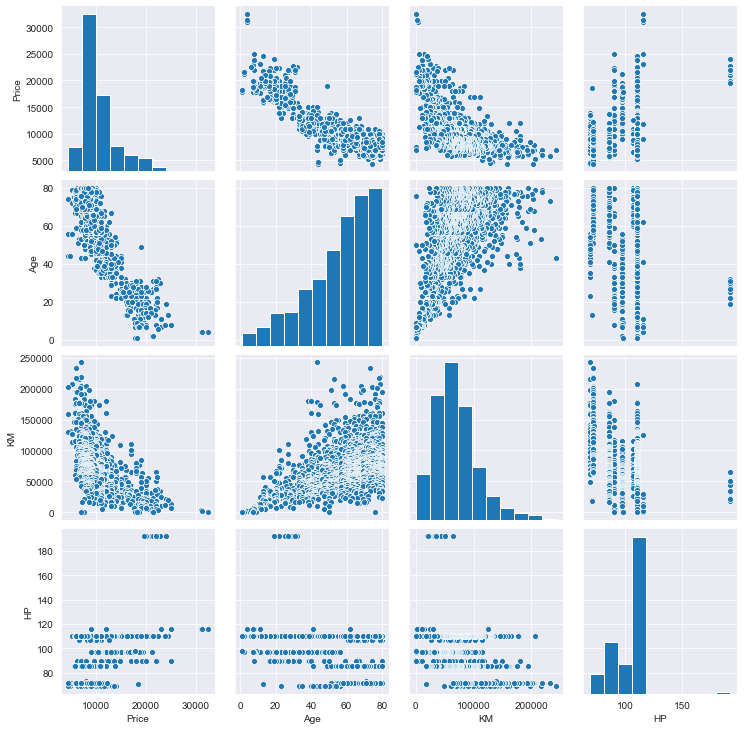

In [26]:
#scatter plot between variables along with histogram
sns.set_style(style='darkgrid')
sns.pairplot(Toyota)

In [96]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP',data=Toyota).fit()

In [98]:
#Coefficients
model.params

Intercept    16450.188784
Age           -154.626264
KM              -0.011462
HP              36.620541
dtype: float64

In [99]:
# summary shows that all the variables are significant
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2039.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:39:27   Log-Likelihood:                -12613.
No. Observations:                1436   AIC:                         2.523e+04
Df Residuals:                    1432   BIC:                         2.526e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.645e+04    351.717     46.771      0.000    1.58e+04    1.71e+04
Age         -154.6263      2.602    -59.432      0.000    -159.730    -149.523
KM            -0.0115      0.001     -8.480      0.000      -0.014      -0.009
HP            36.6205      2.956     12.388      0.000      30.822      42.419
==============================================================================
Omnibus:                      417.364   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.238
Skew:                           1.157   Prob(JB):                         0.00
Kurtosis:                       9.693   Cond. No.                     6.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
rsq_hp = smf.ols('HP~Age+KM',data=Toyota).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_km = smf.ols('KM~Age+HP',data=Toyota).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_Age = smf.ols('Age~KM+HP',data=Toyota).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 


# Storing vif values in a data frame
d1 = {'Variables':['HP','AGE','KM'],'VIF':[vif_hp,vif_km,vif_Age]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,HP,1.125419
1,AGE,1.474968
2,KM,1.343847


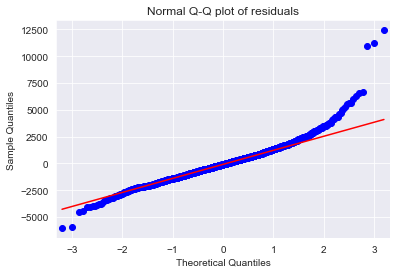

In [100]:
#residual analysis,test for normality of residulas
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [34]:
list(np.where(model.resid>2500)) 

[array([   7,   13,   14,   15,   16,   43,   45,   46,   49,   52,   53,
          62,   66,   68,   72,   74,   76,   80,   89,   91,   92,   95,
         109,  110,  111,  112,  113,  114,  115,  116,  118,  119,  121,
         125,  138,  139,  141,  146,  147,  149,  151,  154,  161,  167,
         171,  174,  178,  179,  523,  557,  632,  696,  913, 1045, 1054,
        1058, 1059, 1079, 1081, 1082, 1085, 1090, 1109, 1175, 1182, 1307,
        1378, 1383, 1402, 1432], dtype=int64)]

In [101]:
# residual plot for homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

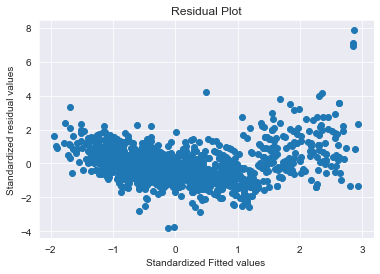

In [102]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

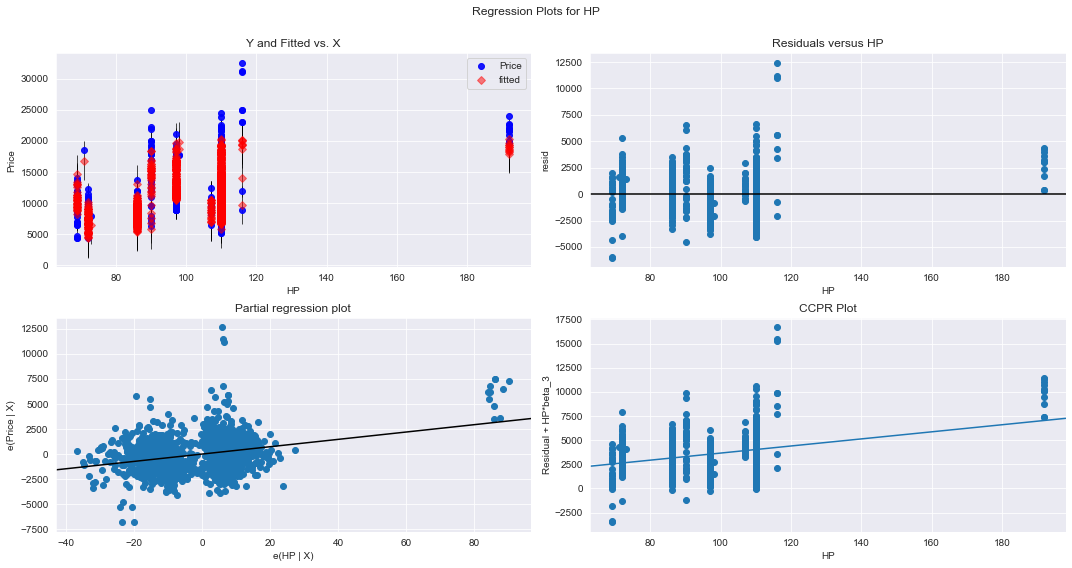

In [37]:
# residual vs regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

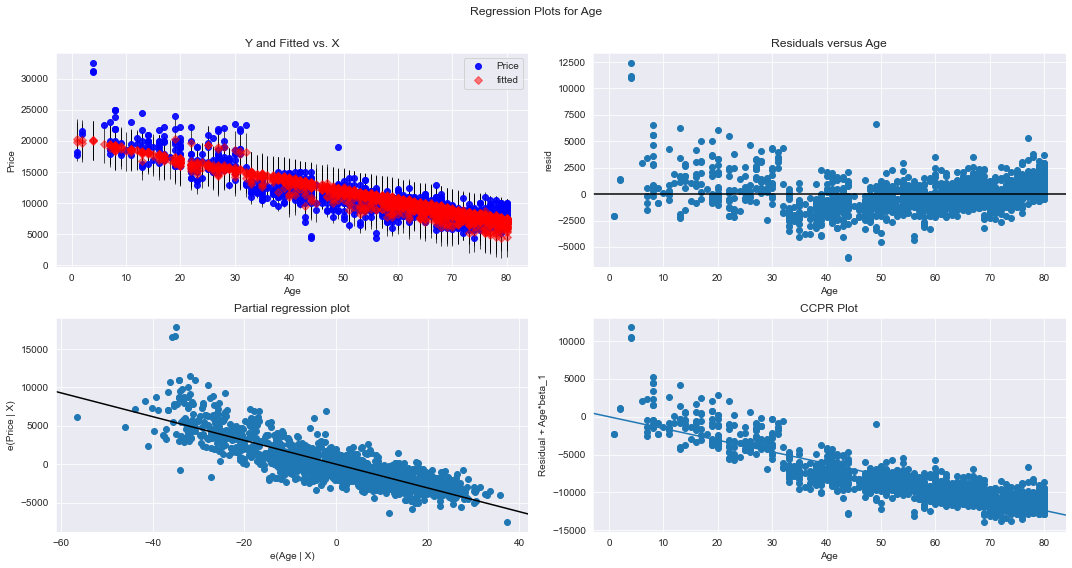

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

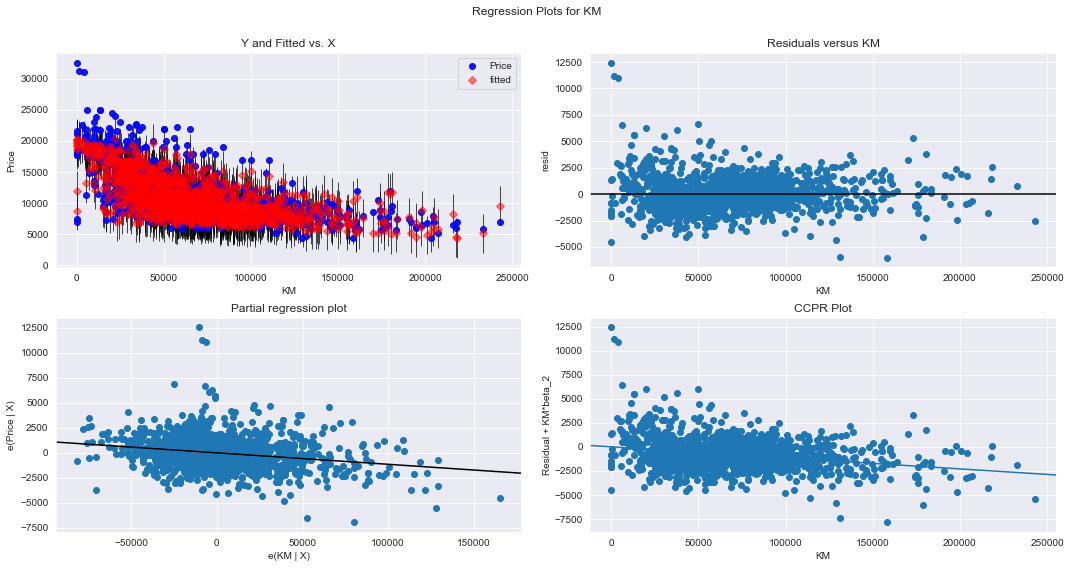

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

In [103]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-57-7ebf02de9a31>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Toyota)), np.round(c, 3))


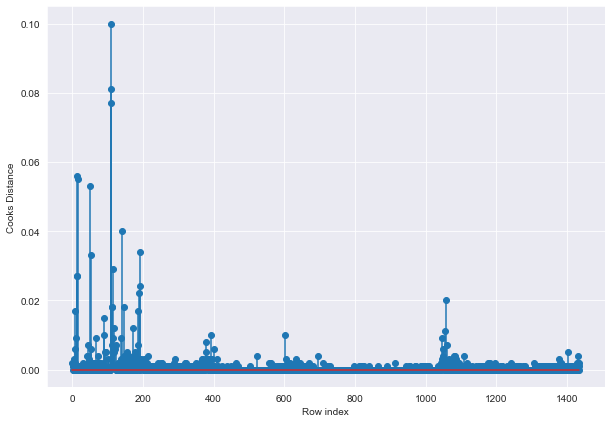

In [57]:
fig = plt.subplots(figsize=(10,7))
plt.stem(np.arange(len(Toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [104]:
#index and value of influencer where c is more than .5, since the value is less than 1 we can ignore it
(np.argmax(c),np.max(c))

(109, 0.10016319600529609)

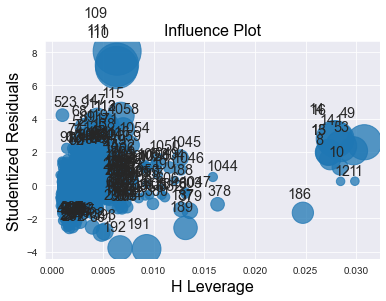

In [46]:
# highly influential points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [105]:
# Highly influential points are 1044,378,186,12,11,10,53,49,141,16,14,15,8,13
k = Toyota.shape[1]
n = Toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.01253481894150418

In [122]:
Toyota[Toyota.index.isin([1044,378,186,12,11,10,53,49,141,16,14,15,8,13])]

,Model,Price,Age,KM,HP
8,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,19700,192
10,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,31461,192
11,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...,19950,22,43610,192
12,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,32189,192
13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,23000,192
14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22500,32,34131,192
15,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22000,28,18739,192
16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-...,22750,30,34000,192
49,TOYOTA Corolla 1.8 16V VVTLI 5DR T SPORT 4/5-D...,21950,31,64982,192
53,TOYOTA Corolla 1.8 VVTL-i T-Sport 4/5-Doors,21950,27,49866,192


In [123]:
# to see the differences between variables
Toyota.head()

,Model,Price,Age,KM,HP
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90


In [138]:
#Discard the data points which are influencers and reasign the row number (reset
Toyota1=Toyota.drop(Toyota.index[[1044,378,186,12,11,10,53,49,141,16,14,15,8,13]],axis=0)



In [139]:
pd.set_option("display.max_rows",1422) 
Toyota1

,Model,Price,Age,KM,HP
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,61000,90
6,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,94612,90
7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,75889,90
9,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,71138,69
17,TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2...,17950,24,21716,110


In [130]:
#Building the model
final_ml= smf.ols('Price~Age+KM+HP',data=Toyota1).fit()

In [131]:
# correlation and AKAI values
(final_ml.rsquared,final_ml.aic)

(0.8039783021261973, 24939.47441604844)

In [132]:
#cooks distance, since cooks distance is less than 1, we can stop the daignostics process and initialize the model
model_influence_ml = final_ml.get_influence()
(c_ml, _) = model_influence_ml.cooks_distance

<ipython-input-133-3224d9d86876>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Toyota1)),np.round(c_ml,3));


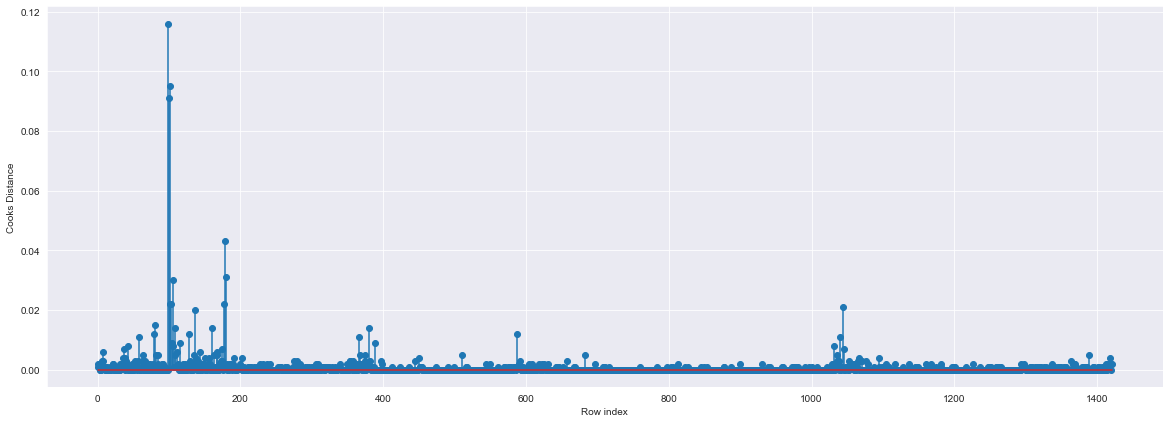

In [133]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota1)),np.round(c_ml,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [137]:
# Predicting the new data
pred = final_ml.predict(Toyota)
pred

0       15740.868955
1       15412.390669
2       15654.948601
3       15269.965977
4       14779.455995
            ...     
1431     8959.571504
1432     8521.046756
1433     8698.848883
1434     8852.804025
1435     8704.446960
Length: 1436, dtype: float64